In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from material_params import CalciteUpper, Quartz, Sapphire, CalciteLower

plt.rcParams.update({'mathtext.default': 'regular' })
plt.rcParams.update({'font.family': 'Arial' })

from matplotlib import interactive
interactive(True)

In [2]:
calcite = CalciteUpper(freq_min= 1400, freq_max = 1600)

In [3]:
ext, ord = calcite.permittivity_fetch()

In [15]:
tensor = calcite.fetch_permittivity_tensor_for_freq(1527)

In [16]:
tensor

<tf.Tensor: shape=(3, 3), dtype=complex128, numpy=
array([[-0.53167046+0.13951287j,  0.        +0.j        ,
         0.        +0.j        ],
       [ 0.        +0.j        , -0.53167046+0.13951287j,
         0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         2.27829395+0.00055597j]])>

In [6]:
def plot_permittivity(material, eps_ext, eps_ord):
    plt.rcParams.update(
        {
            "font.size": 20,
            "axes.labelsize": 20,
            "axes.titlesize": 22,
            "xtick.labelsize": 20,
            "ytick.labelsize": 20,
            "legend.fontsize": 17,
        }
    )

    fig, ax = plt.subplots(
        figsize=(6, 4)
    )

    # Plot real part of permittivity
    ax.plot(
        material.frequency,
        tf.math.real(eps_ext),
        label=r"$\mathrm{Re}(\varepsilon_\mathrm{ext})$",
    )
    ax.plot(
        material.frequency,
        tf.math.real(eps_ord),
        label=r"$\mathrm{Re}(\varepsilon_\mathrm{ord})$",
    )
    ax.axhline(y=0, color="black", linewidth=1)
    ax.set(ylabel=r"$\mathrm{Re}(\epsilon)$")
    ax.legend()
    ax.set_xlabel("Wavenumber (cm$^{-1}$)")
    plt.show()


c:\Users\2719913C\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


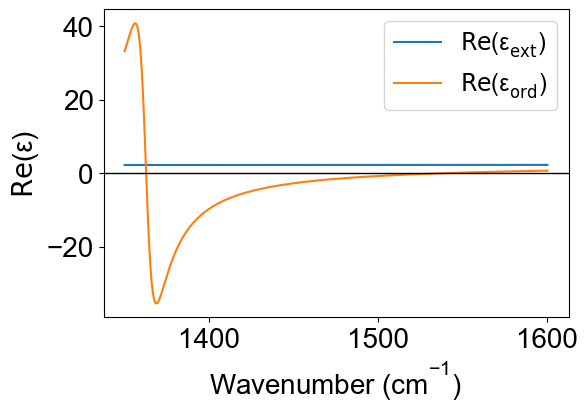

In [12]:
plot_permittivity(quartz, ext, ord)

In [13]:
import math as m

In [14]:
quartz = Quartz()

In [15]:
ext = quartz.fetch_permittivity_tensor()[...,2,2][...,tf.newaxis]
perm_ord = quartz.fetch_permittivity_tensor()[...,0,0][...,tf.newaxis]

In [16]:
frequency = tf.linspace(410,600,300)[:, tf.newaxis]
incident_angle = tf.linspace(
            tf.constant(-m.pi/2., dtype=tf.float64),
            tf.constant(m.pi/2., dtype=tf.float64),
            180)[tf.newaxis,:]
eps_prism = tf.cast(11.5, dtype= tf.float64)
k_0 = frequency * 2 * m.pi
k_x = k_0 * tf.sin(incident_angle) * tf.math.sqrt(eps_prism)

k_0 = tf.cast(k_0, dtype=tf.complex128)
k_x = tf.cast(k_x, dtype=tf.complex128)

kz_spol = tf.math.sqrt(k_0**2. * perm_ord - k_x**2.)

kz_ppol = tf.math.sqrt(k_0**2. * perm_ord - k_x**2. * (perm_ord/ext))

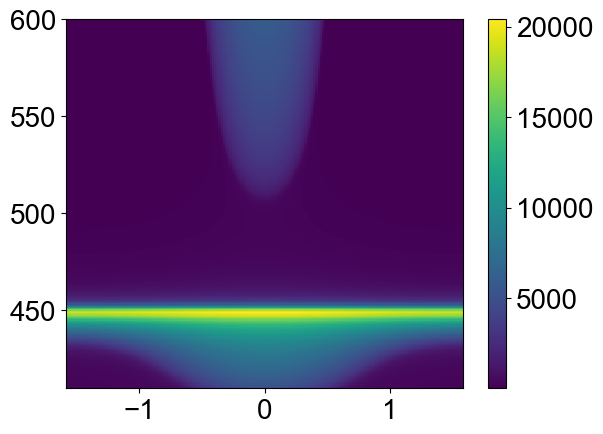

In [17]:
plt.pcolormesh(tf.math.real(incident_angle), tf.math.real(frequency), tf.math.real(kz_spol))
plt.colorbar()

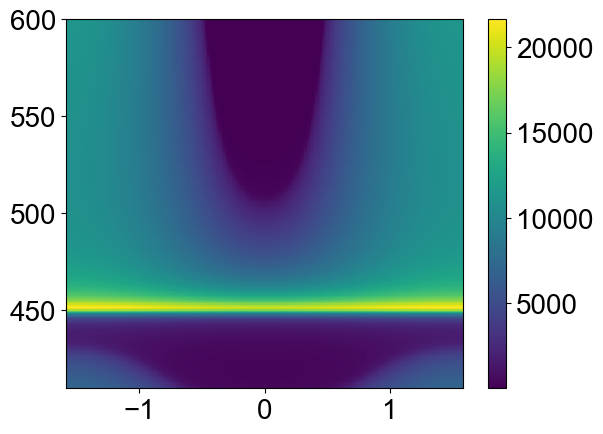

In [18]:
plt.pcolormesh(tf.math.real(incident_angle), tf.math.real(frequency), tf.math.imag(kz_spol))
plt.colorbar()

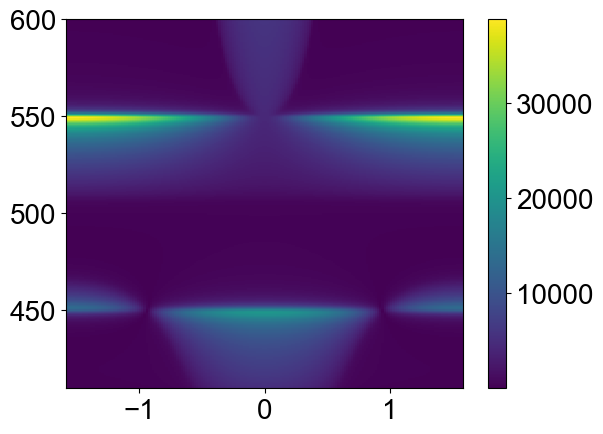

In [19]:
plt.pcolormesh(tf.math.real(incident_angle), tf.math.real(frequency), tf.math.real(kz_ppol))
plt.colorbar()

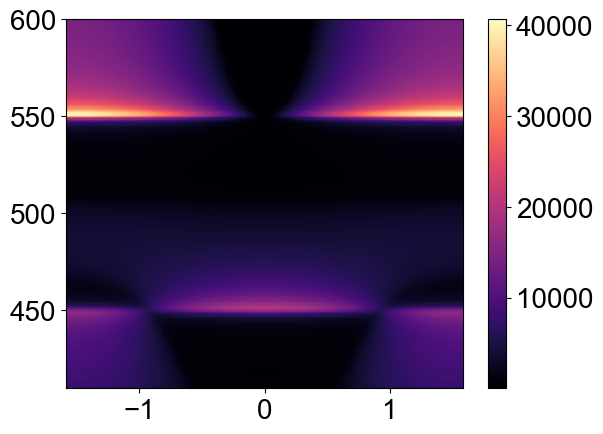

In [20]:
plt.pcolormesh(tf.math.real(incident_angle), tf.math.real(frequency), tf.math.abs(tf.math.imag(kz_ppol)), cmap='magma')
plt.colorbar()